<a href="https://colab.research.google.com/github/JeonginWon/DataAnalysisProject-Household-Loan-Delinquency-Rate-Prediction-Model/blob/main/ANOVA_%EC%B5%9C%EC%A2%85%2B%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling : ANOVA_검정
여러개의 집단(3개이상)이 서로 유의미한 차이가 있는지 검증하는 통계적 기법

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#필요한 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import rc
import seaborn as sns
!wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
!unzip -o NotoSansCJKkr-hinted.zip
!mv NotoSansCJKkr* /usr/share/fonts/

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.fontManager.addfont(path='/usr/share/fonts/NotoSansCJKkr-Medium.otf')
prop = fm.FontProperties(fname='/usr/share/fonts/NotoSansCJKkr-Medium.otf')
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['font.weight'] = prop.get_weight()

--2023-08-24 07:50:26--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 142.250.97.207, 142.251.107.207, 74.125.196.207, ...
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|142.250.97.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip’

NotoSansCJKkr-hinte 100%[===================>] 115.55M  98.7MB/s    in 1.2s    

2023-08-24 07:50:27 (98.7 MB/s) - ‘NotoSansCJKkr-hinted.zip’ saved [121163981/121163981]

Archive:  NotoSansCJKkr-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKkr-Black.otf  
  inflating: NotoSansCJKkr-Bold.otf  
  inflating: NotoSansCJKkr-DemiLight.otf  
  inflating: NotoSansCJKkr-Light.otf  
  inflating: NotoSansCJKkr-Medium.otf  
  inflating: NotoSansCJKkr-Regular.otf  
  inflating: Not

In [ ]:
import scipy.stats as stats
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%matplotlib inline

In [ ]:
from pandas.io.excel import read_excel
#데이터 불러오기
anova = pd.read_excel("/content/drive/MyDrive/전처리_원정인/ANOVA최종데이터.xlsx")

In [ ]:
anova

,3개월_지가변동률,3개월_주택거래량,3개월_예금은행 기타 가계대출금,3개월_가계대출 연체율,3개월_기준금리,6개월_지가변동률,6개월_주택거래량,6개월_예금은행 기타 가계대출금,6개월_가계대출 연체율,6개월_기준금리,12개월_지가변동률,12개월_주택거래량,12개월_예금은행 기타 가계대출금,12개월_가계대출 연체율,12개월_기준금리
0,0.358,32558,44477.7,0.24,1.25,0.031,5893,8900.7,0.33,1.25,0.347,10216,12824.1,0.34,1.25
1,0.358,3031,4795.8,0.31,1.25,0.436,4982,5746.7,0.31,1.25,0.475,22156,99700.9,0.28,1.25
2,0.383,5376,8231.1,0.26,1.25,0.067,2595,3983.5,0.30,1.25,0.284,3577,4119.4,0.13,1.25
3,0.362,30968,44576.4,0.27,1.25,0.032,4729,8801.9,0.38,1.25,0.320,7531,12765.5,0.37,1.25
4,0.387,2951,4705.1,0.35,1.25,0.469,3858,5728.4,0.34,1.25,0.457,16834,99210.1,0.31,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,-0.002,1398,5907.2,0.52,3.50,0.052,1434,5316.3,0.27,3.50,-0.004,5122,118437.9,0.42,3.50
122,-0.010,2297,9080.4,0.27,3.50,-0.021,1077,3597.9,0.18,3.50,0.006,1816,3838.3,0.19,3.50
123,0.058,14086,42587.1,0.28,3.50,0.017,3598,7961.0,0.32,3.50,0.002,3344,12596.5,0.40,3.50
124,0.004,1680,5946.9,0.59,3.50,0.051,1607,5293.9,0.27,3.50,0.052,6468,118602.3,0.47,3.50


# ANOVA검정 1차 - 종속변수
지역을 3가지로 군집화 (시차별)

- 3개월: 경기, 광주, 대구

- 6개월: 대전, 경북, 울산

- 12개월: 서울, 전남, 부산

1차 AVNOVA(분산분석) : 군집화된 3부류의 연체율(y)변수의 차이가 유의미함을 확인

In [ ]:
anova.columns

Index(['3개월_지가변동률', '3개월_주택거래량', '3개월_예금은행 기타 가계대출금', '3개월_가계대출 연체율',
       '3개월_기준금리', '6개월_지가변동률', '6개월_주택거래량', '6개월_예금은행 기타 가계대출금',
       '6개월_가계대출 연체율', '6개월_기준금리', '12개월_지가변동률', '12개월_주택거래량',
       '12개월_예금은행 기타 가계대출금', '12개월_가계대출 연체율', '12개월_기준금리'],
      dtype='object')

In [ ]:
x1 = np.array(anova['3개월_가계대출 연체율'])
x2 = np.array(anova['6개월_가계대출 연체율'])
x3 = np.array(anova['12개월_가계대출 연체율'])

In [ ]:
# ANOVA 검증
from scipy.stats import f_oneway
result = f_oneway(x1, x2, x3)

# 결과 출력
print("ANOVA 결과:")
print("통계량 (F-statistic):", result.statistic)
print("p-value:", result.pvalue)

if result.pvalue < 0.05:
    print("유의미한 차이가 있음")
else:
    print("유의미한 차이가 없음")

ANOVA 결과:
통계량 (F-statistic): 3.2507941815749883
p-value: 0.039837950531481287
유의미한 차이가 있음


## 유의미한 결과가 있음

##시각화

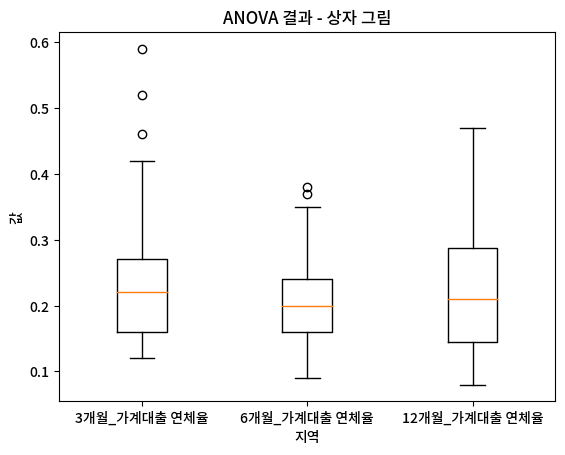

In [ ]:
# 상자 그림 시각화
data = [x1, x2, x3]
labels = ['3개월_가계대출 연체율', '6개월_가계대출 연체율', '12개월_가계대출 연체율']

plt.boxplot(data, labels=labels)
plt.title("ANOVA 결과 - 상자 그림")
plt.xlabel("지역")
plt.ylabel("값")
plt.show()

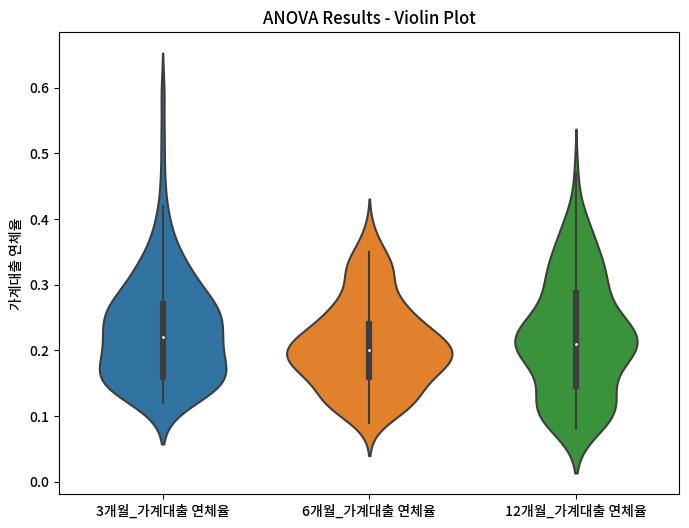

In [ ]:
import seaborn as sns

# 바이올린 플롯 시각화
plt.figure(figsize=(8, 6))
sns.violinplot(data=[x1, x2, x3])
plt.xticks([0, 1, 2], ['3개월_가계대출 연체율', '6개월_가계대출 연체율', '12개월_가계대출 연체율'])
plt.title('ANOVA Results - Violin Plot')
plt.ylabel('가계대출 연체율')
plt.show()

# ANOVA검정 2차 - 독립변수
2차 AVNOVA(분산분석) : 군집화된 3부류의 독립변수들(x)의 차이가 유의미함을 확인

## 지가변동률

In [ ]:
x1 = np.array(anova['3개월_지가변동률'])
x2 = np.array(anova['6개월_지가변동률'])
x3 = np.array(anova['12개월_지가변동률'])

In [ ]:
# ANOVA 검증
from scipy.stats import f_oneway
result = f_oneway(x1, x2, x3)

# 결과 출력
print("ANOVA 결과:")
print("통계량 (F-statistic):", result.statistic)
print("p-value:", result.pvalue)

if result.pvalue < 0.05:
    print("유의미한 차이가 있음")
else:
    print("유의미한 차이가 없음")

ANOVA 결과:
통계량 (F-statistic): 15.004555401982072
p-value: 5.385351167139591e-07
유의미한 차이가 있음


##지가변동률_시각화

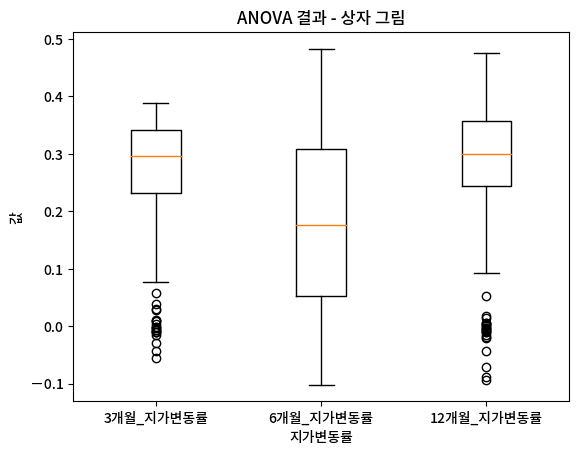

In [ ]:
# 상자 그림 시각화
data = [x1, x2, x3]
labels = ['3개월_지가변동률', '6개월_지가변동률', '12개월_지가변동률']

plt.boxplot(data, labels=labels)
plt.title("ANOVA 결과 - 상자 그림")
plt.xlabel("지가변동률")
plt.ylabel("값")
plt.show()

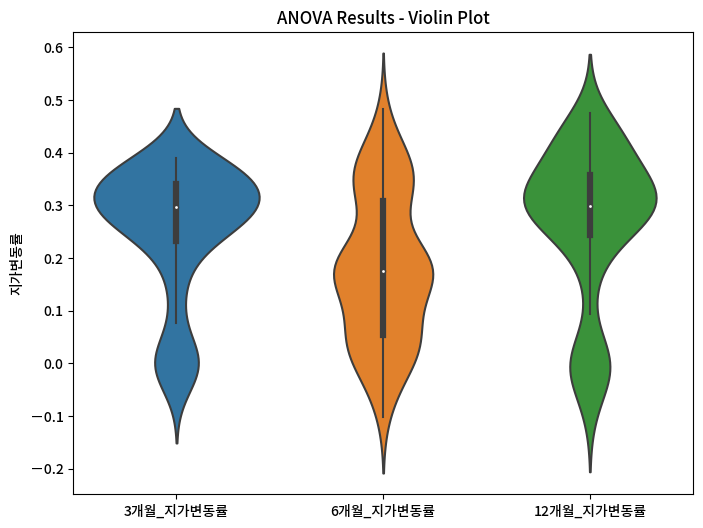

In [ ]:
import seaborn as sns

# 바이올린 플롯 시각화
plt.figure(figsize=(8, 6))
sns.violinplot(data=[x1, x2, x3])
plt.xticks([0, 1, 2], ['3개월_지가변동률', '6개월_지가변동률', '12개월_지가변동률'])
plt.title('ANOVA Results - Violin Plot')
plt.ylabel('지가변동률')
plt.show()

##주택거래량

In [ ]:
x1 = np.array(anova['3개월_주택거래량'])
x2 = np.array(anova['6개월_주택거래량'])
x3 = np.array(anova['12개월_주택거래량'])

In [ ]:
# ANOVA 검증
from scipy.stats import f_oneway
result = f_oneway(x1, x2, x3)

# 결과 출력
print("ANOVA 결과:")
print("통계량 (F-statistic):", result.statistic)
print("p-value:", result.pvalue)

if result.pvalue < 0.05:
    print("유의미한 차이가 있음")
else:
    print("유의미한 차이가 없음")

ANOVA 결과:
통계량 (F-statistic): 21.858323819755274
p-value: 1.0491072928859505e-09
유의미한 차이가 있음


##주택거래량_시각화

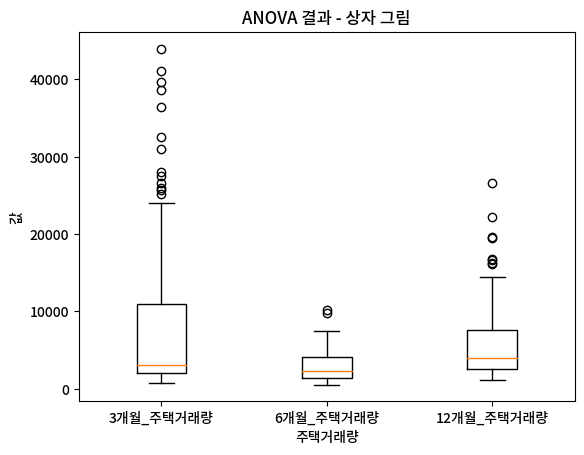

In [ ]:
# 상자 그림 시각화
data = [x1, x2, x3]
labels = ['3개월_주택거래량', '6개월_주택거래량', '12개월_주택거래량']

plt.boxplot(data, labels=labels)
plt.title("ANOVA 결과 - 상자 그림")
plt.xlabel("주택거래량")
plt.ylabel("값")
plt.show()

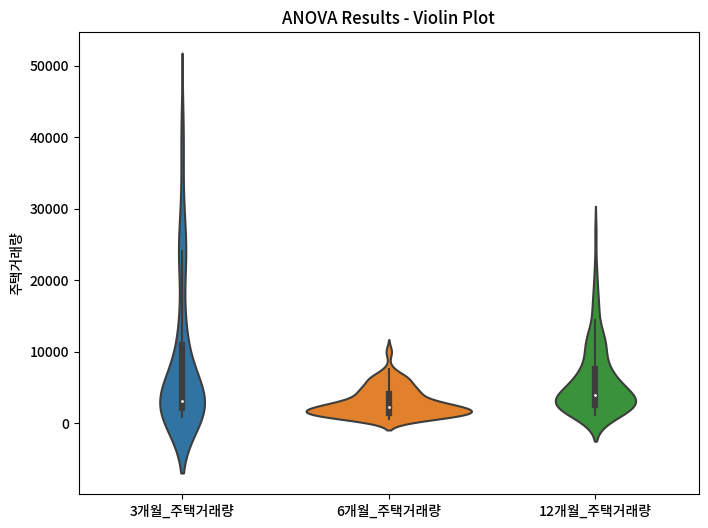

In [ ]:
import seaborn as sns

# 바이올린 플롯 시각화
plt.figure(figsize=(8, 6))
sns.violinplot(data=[x1, x2, x3])
plt.xticks([0, 1, 2], ['3개월_주택거래량', '6개월_주택거래량', '12개월_주택거래량'])
plt.title('ANOVA Results - Violin Plot')
plt.ylabel('주택거래량')
plt.show()

##예금은행 기타 가계대출금

In [ ]:
x1 = np.array(anova['3개월_예금은행 기타 가계대출금'])
x2 = np.array(anova['6개월_예금은행 기타 가계대출금'])
x3 = np.array(anova['12개월_예금은행 기타 가계대출금'])

In [ ]:
# ANOVA 검증
from scipy.stats import f_oneway
result = f_oneway(x1, x2, x3)

# 결과 출력
print("ANOVA 결과:")
print("통계량 (F-statistic):", result.statistic)
print("p-value:", result.pvalue)

if result.pvalue < 0.05:
    print("유의미한 차이가 있음")
else:
    print("유의미한 차이가 없음")

ANOVA 결과:
통계량 (F-statistic): 47.102964485412215
p-value: 5.626108196501558e-19
유의미한 차이가 있음


##예금은행 기타 가계대출금_시각화


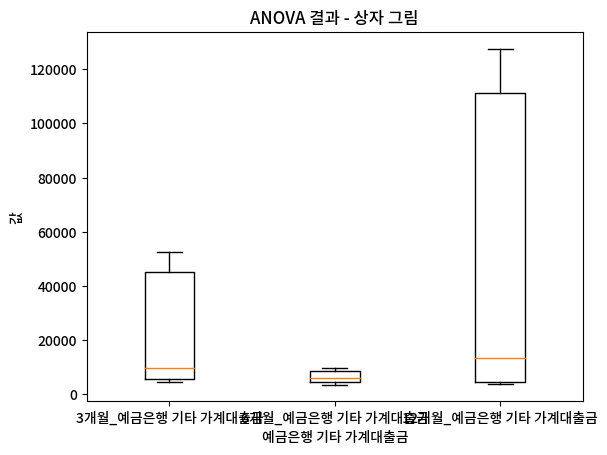

In [ ]:
# 상자 그림 시각화
data = [x1, x2, x3]
labels = ['3개월_예금은행 기타 가계대출금', '6개월_예금은행 기타 가계대출금', '12개월_예금은행 기타 가계대출금']

plt.boxplot(data, labels=labels)
plt.title("ANOVA 결과 - 상자 그림")
plt.xlabel("예금은행 기타 가계대출금")
plt.ylabel("값")
plt.show()

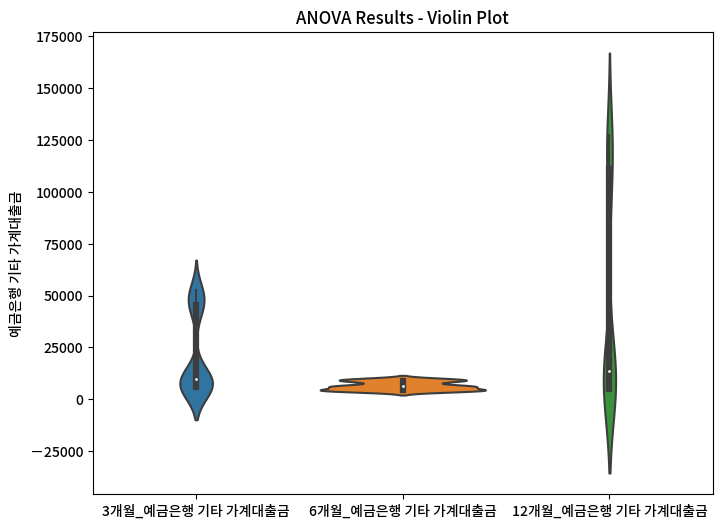

In [ ]:
import seaborn as sns

# 바이올린 플롯 시각화
plt.figure(figsize=(8, 6))
sns.violinplot(data=[x1, x2, x3])
plt.xticks([0, 1, 2], ['3개월_예금은행 기타 가계대출금', '6개월_예금은행 기타 가계대출금', '12개월_예금은행 기타 가계대출금'])
plt.title('ANOVA Results - Violin Plot')
plt.ylabel('예금은행 기타 가계대출금')
plt.show()

## 기준금리(유의미한 차이 없음/ 지역별로 딱히 차이가 없다고 할 수 있음 전국단위로 움직이는 지표임)

In [ ]:
x1 = np.array(anova['3개월_기준금리'])
x2 = np.array(anova['6개월_기준금리'])
x3 = np.array(anova['12개월_기준금리'])

In [ ]:
# ANOVA 검증
from scipy.stats import f_oneway
result = f_oneway(x1, x2, x3)

# 결과 출력
print("ANOVA 결과:")
print("통계량 (F-statistic):", result.statistic)
print("p-value:", result.pvalue)

if result.pvalue < 0.05:
    print("유의미한 차이가 있음")
else:
    print("유의미한 차이가 없음")

ANOVA 결과:
통계량 (F-statistic): 2.5980091585157993e-30
p-value: 1.0
유의미한 차이가 없음


##기준금리_시각화

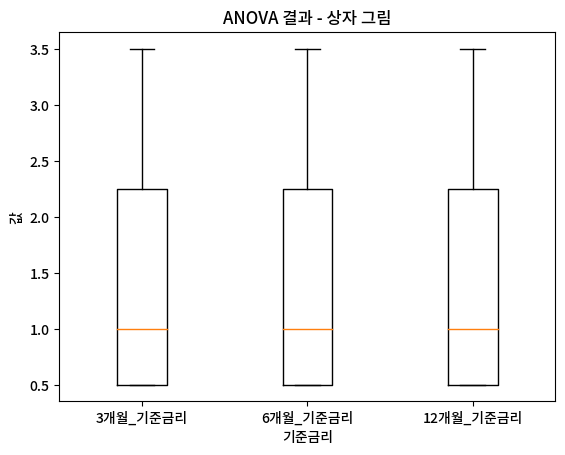

In [ ]:
# 상자 그림 시각화
data = [x1, x2, x3]
labels = ['3개월_기준금리', '6개월_기준금리', '12개월_기준금리']

plt.boxplot(data, labels=labels)
plt.title("ANOVA 결과 - 상자 그림")
plt.xlabel("기준금리")
plt.ylabel("값")
plt.show()